<a href="https://colab.research.google.com/github/ajk7196/Telecom-churn/blob/main/Telecom_churn_analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
# Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Definig path of the directory
path='/content/drive/MyDrive/data science/'
df=pd.read_csv( path +'Telecom Churn.csv')

In [3]:
#Analyzing the data of the first 5 rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#Checking overall summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#No null values in the data so lets move onto thee customers in which we are interested i.e. churned ones

In [6]:
#Check for the no. of customers which churned
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [7]:
#Definig New column for Total charges 
df['charges']=df['Total day charge']+df['Total eve charge']+df['Total night charge']
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,charges
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,57.43
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,60.94
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,63.93
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,56.18


In [8]:
#No. of customer service calls made y the customers
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [27]:
#No. of customers which have International plans
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
df['charges'].describe()

In [9]:
#Definig New column for Total Calls made 
df['calls']=df['Total day calls']+df['Total eve calls']+df['Total night calls']
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,charges,calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86,300
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54,329
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00,328
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02,248
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,57.43,286
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,60.94,235
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,63.93,258
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,56.18,326


In [10]:
#Defining new column foe the total no. of minutes consumedd in a day by customer
df['mins']=df['Total day minutes']+df['Total eve minutes']+df['Total night minutes']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


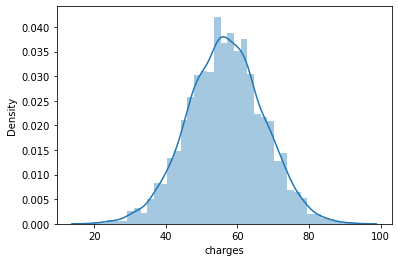

In [11]:
sns.distplot(df['charges'])
#Distribution plot shows that this data is normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


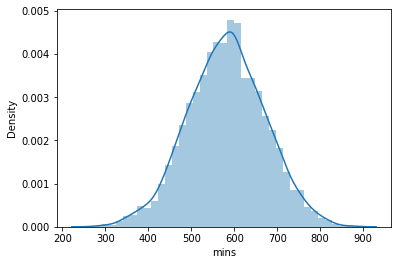

In [31]:
sns.distplot(df['mins'])

In [33]:
Churn= df['Churn'].value_counts()
Churn

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 0, 'If churned')

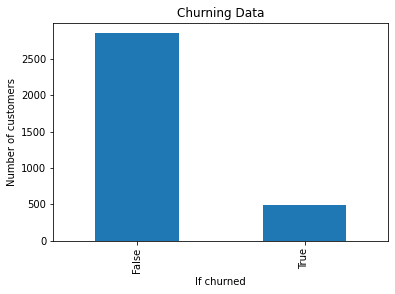

In [19]:
Churn.plot(kind='bar')
plt.title('Churning Data')
plt.ylabel('Number of customers')
plt.xlabel('If churned')
#Bar plot for number of customers who churned

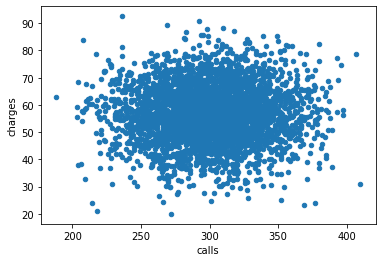

In [36]:
#Scatter plot between calls and charges
calls='calls'
charges='charges'
data=pd.concat([df[calls],df[charges]],axis=1)
data.plot.scatter(x=calls, y=charges);

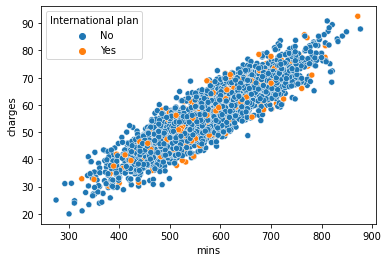

In [36]:
sns.scatterplot(x="mins", y="charges",hue='International plan', data=df)

In [ ]:
#customers having international plans are unifromally distributed

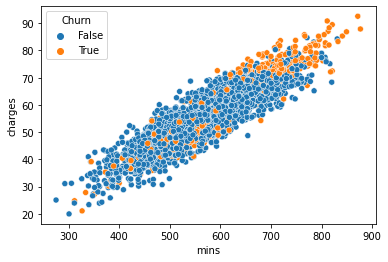

In [37]:
#scatter plot between minutes and charges
sns.scatterplot(x="mins", y="charges", hue="Churn", data=df)

In [ ]:
#Above scatter plot shows that customer whose charges are higher have churned.
#Now lets see if Customer service calls have any impact on the customers whose charges are higher

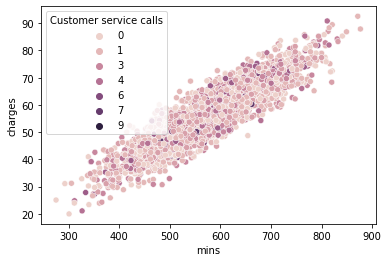

In [40]:
#Scatter plot between charges and min on basis of customer service calls
sns.scatterplot(x="mins", y="charges", hue="Customer service calls", data=df)
sns.title('Scatter for charges and minutes')

In [ ]:
#It seems that the scatter spread fro customer service calls is normal.

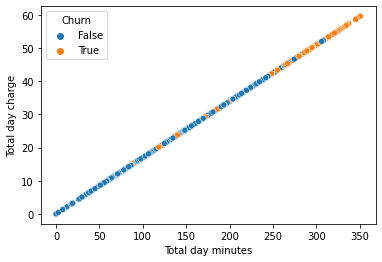

In [29]:
#Scatter plot for day charge and mins
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df)


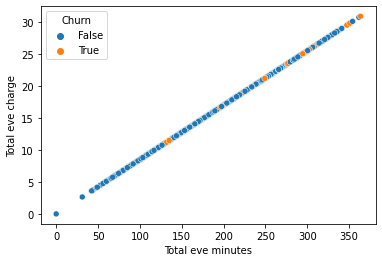

In [30]:
#Scatter plot for eve charge and mins
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df)

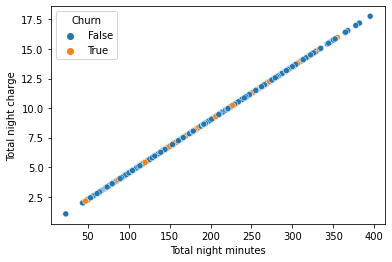

In [31]:
#scatter plot for night charge and mins
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df)

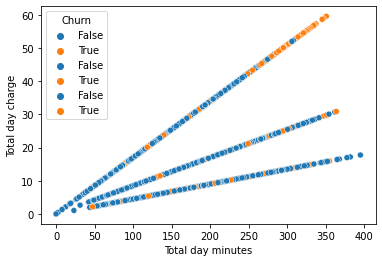

In [34]:
# sns.scatterplot(x='mins',y='charges',hue='Churn',data=df)
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df)
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df)
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df)

In [17]:
# As we can see that customers which have high no. of calls in day have higher charges and most of these customers has opt out for the services.
#Let us check the rates for day, evening and night.
Average_charge_per_minute=df['charges'].sum()/df['mins'].sum()
Avg_charge_per_min_day=df['Total day charge'].sum()/df['Total day minutes'].sum()
Avg_charge_per_min_eve=df['Total eve charge'].sum()/df['Total eve minutes'].sum()
Avg_charge_per_min_night=df['Total night charge'].sum()/df['Total night minutes'].sum()

In [26]:
print('Average charge per minute is :',"{:.2f}".format(Average_charge_per_minute))
print('Average charge per min in day time is :',"{:.2f}".format(Avg_charge_per_min_day))
print('Average charge per min in eve time is :',"{:.2f}".format(Avg_charge_per_min_eve))
print('Average charge per min in night time is :',"{:.2f}".format(Avg_charge_per_min_night))

Average charge per minute is : 0.10
Average charge per min in day time is : 0.17
Average charge per min in eve time is : 0.09
Average charge per min in night time is : 0.05


In [19]:
#This is clearly visible that charges in the day are almost doouble than day andoverall avg charges, and almost 3 times than night charges.
#What the Telecom company can do to retain the customers is, they can come up with special monthly day plan for the customers who has interest in this. 